In [108]:
import pandas as pd

## Crypto tweets

In [109]:
cryptonews = pd.read_csv("../res/input/cryptonews.csv")
cryptonews.head()

,date,sentiment,source,subject,text,title,url
0,2023-04-05 06:52:09,"{'class': 'negative', 'polarity': -0.03, 'subj...",CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,https://cointelegraph.com/news/allbridge-to-fi...
1,2023-04-05 06:19:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,https://cryptopotato.com/bitcoin-hodl-patterns...
2,2023-04-05 05:09:44,"{'class': 'negative', 'polarity': -0.04, 'subj...",CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,https://cointelegraph.com/news/eth-hits-7-mont...
3,2023-04-05 01:09:52,"{'class': 'positive', 'polarity': 0.07, 'subje...",CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",https://cointelegraph.com/news/marathon-digita...
4,2023-04-04 23:49:00,"{'class': 'positive', 'polarity': 0.4, 'subjec...",CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,https://cryptopotato.com/brazilian-finance-gia...


In [110]:
cryptonews.describe()

,date,sentiment,source,subject,text,title,url
count,18543,18543,18543,18543,18543,18543,18543
unique,18304,3196,3,6,18131,18511,18543
top,2022-01-14 00:00:00,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,bitcoin,"Get your daily, bite-sized digest of cryptoass...",Is it Too Late to Buy Shiba Inu? Crypto Expert...,https://cointelegraph.com/news/allbridge-to-fi...
freq,26,4195,8675,6439,326,4,1


In [111]:
cryptonews.isnull().sum()

date         0
sentiment    0
source       0
subject      0
text         0
title        0
url          0
dtype: int64

In [112]:
# Convert sentiment column from string to dict
cryptonews["sentiment"] = cryptonews["sentiment"].apply(eval)

# Split dictionary in separate columns
df_sentiment = pd.json_normalize(cryptonews["sentiment"])
cryptonews = pd.concat([cryptonews, df_sentiment], axis=1)

# Convert date column to datetime
cryptonews['date'] = pd.to_datetime(cryptonews['date'], format='mixed', errors='coerce')

cryptonews = cryptonews.drop(columns=["sentiment", "url"])
cryptonews = cryptonews.rename(columns={"class": "label"})

cryptonews.head()

,date,source,subject,text,title,label,polarity,subjectivity
0,2023-04-05 06:52:09,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00
2,2023-04-05 05:09:44,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31
3,2023-04-05 01:09:52,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40


In [113]:
cryptonews.to_csv("../res/prepared/cryptonews.csv", index=False)

## Huggingface

### zeroshot twitter financial news

In [114]:
splits = {'train': 'sent_train.csv', 'validation': 'sent_valid.csv'}
hf_twitter_financial_news_train = pd.read_csv("hf://datasets/zeroshot/twitter-financial-news-sentiment/" + splits["train"])
hf_twitter_financial_news_val = pd.read_csv("hf://datasets/zeroshot/twitter-financial-news-sentiment/" + splits["validation"])

hf_twitter_financial_news = pd.concat([hf_twitter_financial_news_train, hf_twitter_financial_news_val], ignore_index=True)
hf_twitter_financial_news.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [115]:
hf_twitter_financial_news["label"] = hf_twitter_financial_news["label"].replace({0: "negative", 1: "positive", 2: "neutral"})
hf_twitter_financial_news

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,negative
1,$CCL $RCL - Nomura points to bookings weakness...,negative
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",negative
3,$ESS: BTIG Research cuts to Neutral https://t....,negative
4,$FNKO - Funko slides after Piper Jaffray PT cu...,negative
...,...,...
11926,Stocks making the biggest moves midday: TD Ame...,neutral
11927,Stocks making the biggest moves premarket: Fit...,neutral
11928,Stocks making the biggest moves premarket: Hom...,neutral
11929,Stocks making the biggest moves premarket: TD ...,neutral


In [116]:
hf_twitter_financial_news.to_csv("../res/prepared/hf-twitter-financial-news.csv", index=False)

### ElKulako/stocktwits-crypto

In [117]:
stocktwits_crpyto = pd.read_excel("../res/input/st-data-full.xlsx")
stocktwits_crpyto

,text,label
0,"if you were curious, price chose the lowest ch...",1
1,"true, not even 10k followers here yet.",1
2,dogecoin co-founder billy markus hits back at ...,1
3,"i’m curious, do any bulls have a price where ...",1
4,friday everybody buy 10 more on friday,2
...,...,...
599995,so did i 850% with ! get in below a dollar. st...,2
599996,notice it’s the same few brain dead people bas...,2
599997,attention!!! anyone under the age of 18…. stea...,2
599998,dickhead bears fucked. keep your big mouths s...,2


In [118]:
stocktwits_crpyto["label"].unique()

array([1, 2, 0], dtype=int64)

In [119]:
stocktwits_crpyto = stocktwits_crpyto.dropna(how="any")
stocktwits_crpyto

,text,label
0,"if you were curious, price chose the lowest ch...",1
1,"true, not even 10k followers here yet.",1
2,dogecoin co-founder billy markus hits back at ...,1
3,"i’m curious, do any bulls have a price where ...",1
4,friday everybody buy 10 more on friday,2
...,...,...
599995,so did i 850% with ! get in below a dollar. st...,2
599996,notice it’s the same few brain dead people bas...,2
599997,attention!!! anyone under the age of 18…. stea...,2
599998,dickhead bears fucked. keep your big mouths s...,2


In [120]:
stocktwits_crpyto.to_csv("../res/prepared/st-data-full.csv", index=False)

## Carlo

In [121]:
cryptonews_new = pd.read_csv("../res/input/cryptonews_neu.csv")
cryptonews_new

,id,sentiment,source,subject,text,title
0,10822,negative,cryptonews,altcoin,the ethereum price has dipped by 05 in the pas...,ethereum price prediction as lido eth staking ...
1,7849,neutral,cryptopotato,altcoin,garlinghouse also asserted that us congress sh...,ripples victory over sec is a win for the enti...
2,11657,neutral,cryptonews,altcoin,south korean prosecutors called terra a fictit...,terra cofounder among ten formally charged in ...
3,20528,negative,cointelegraph,bitcoin,a bitcointhemed bar and education center has p...,raising a glass to satoshis place and the chal...
4,18433,negative,cointelegraph,blockchain,ark investments topped up its coinbase stock s...,cathie woods ark adds 121m in coinbase shares ...
...,...,...,...,...,...,...
4995,2231,positive,cointelegraph,nft,the simpsons poked fun at nfts in their annual...,nifty news the simpsons roast nfts yuga labs e...
4996,16173,negative,cointelegraph,defi,while it has become harder to access the crypt...,decentralization meant sanctions couldnt pull ...
4997,8916,neutral,cryptopotato,nft,yuga labs plans to publish a cryptopunks book ...,cryptopunks nft collection turns six heres the...
4998,16228,positive,cointelegraph,bitcoin,the central african republic adopted bitcoin a...,bitcoin sango coin and the central african rep...


In [122]:
cryptonews_new = stocktwits_crpyto.rename(columns={"sentiment": "label"})
cryptonews_new = stocktwits_crpyto.dropna(how="any")
cryptonews_new

,text,label
0,"if you were curious, price chose the lowest ch...",1
1,"true, not even 10k followers here yet.",1
2,dogecoin co-founder billy markus hits back at ...,1
3,"i’m curious, do any bulls have a price where ...",1
4,friday everybody buy 10 more on friday,2
...,...,...
599995,so did i 850% with ! get in below a dollar. st...,2
599996,notice it’s the same few brain dead people bas...,2
599997,attention!!! anyone under the age of 18…. stea...,2
599998,dickhead bears fucked. keep your big mouths s...,2


In [123]:
cryptonews_new.to_csv("../res/prepared/cryptonews_neu.csv", index=False)

## Concatenation

In [124]:
con_cryptonews = cryptonews[["text", "label"]]
con_hf_twitter_financial_news = hf_twitter_financial_news[["text", "label"]]

In [125]:
concatenation = pd.concat([con_cryptonews, con_hf_twitter_financial_news], ignore_index=True)
concatenation

,text,label
0,The compensation process is expected to start ...,negative
1,On-chain analytics revealed a sentiment shift ...,neutral
2,"Ether has broken the $1,900 resistance level f...",negative
3,"With a new quarterly production record, Marath...",positive
4,The stablecoin BTG Dol will supposedly become ...,positive
...,...,...
30469,Stocks making the biggest moves midday: TD Ame...,neutral
30470,Stocks making the biggest moves premarket: Fit...,neutral
30471,Stocks making the biggest moves premarket: Hom...,neutral
30472,Stocks making the biggest moves premarket: TD ...,neutral


<Axes: >

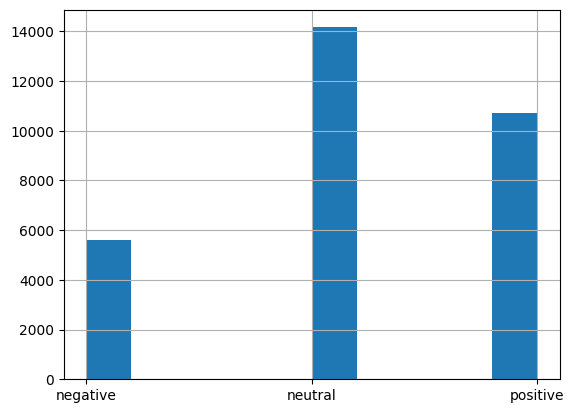

In [127]:
concatenation["label"].hist()

In [128]:
concatenation.to_csv("../res/prepared/concatenation.csv", index=False)